In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import get_config

In [3]:
DATA_FOLDER = "data"

In [40]:
import matplotlib.patches as mpl_patches

def plot_boxplot(csv_file, out_path):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the required columns for each algorithm
    reinforce_steps = data["Reinforce Steps"]
    greedy_steps = data["Greedy Steps"]
    print("Greedy mean: ", greedy_steps.mean())
    print("Reinforce mean: ", reinforce_steps.mean())

    # Box plot for Steps with median values
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="darkgrid")
    sns.boxplot(
        data=[reinforce_steps, greedy_steps],
        showfliers=True,
        medianprops={"color": "black"},
        palette="Set1",
    )
    plt.xlabel("Algorithm")
    plt.ylabel("Steps")
    plt.title("Comparison of Steps between Reinforce and Greedy")
    plt.xticks([0, 1], ["Reinforce", "Greedy"])

    # Add median value as text
    median_reinforce = reinforce_steps.median()
    median_greedy = greedy_steps.median()
    mean_reinforce = round(reinforce_steps.mean(), 2)
    mean_greedy = round(greedy_steps.mean(), 2)
    # create the corresponding number of labels (= the text you want to display)
    labels = []
    labels.append(f"Reinforce\nMedian: {median_reinforce}\nMean: {mean_reinforce}")
    labels.append(f"Greedy\nMedian: {median_greedy}\nMean: {mean_greedy}")
    # create a list with two empty handles (or more if needed)
    handles = [
        mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)
    ] * len(labels)

    # create the legend, supressing the blank space of the empty line symbol and the
    # padding between symbol and label by setting handlelenght and handletextpad
    plt.legend(
        handles,
        labels,
        loc="best",
        fontsize="medium",
        fancybox=True,
        framealpha=0.7,
        handlelength=0,
        handletextpad=0,
    )
    plt.savefig(out_path, dpi=300)
    plt.show()

In [4]:
def plot_boxplot(out_path: str, algorithms: dict[str, pd.DataFrame]):
    labels = []
    algorithm_names = []

    res_df = pd.DataFrame()
    for algorithm, df in algorithms.items():
        algorithm_name = " ".join(algorithm.split("_")).capitalize()
        algorithm_names.append(algorithm_name)

        # Print the % of found
        print(f"{algorithm} found {df['found'].sum() / len(df) * 100:.2f}% of the time")

        df["algorithm"] = algorithm_name
        res_df = pd.concat([res_df, df])

        median = df["steps"].median()
        mean = round(df["steps"].mean(), 2)
        labels.append(f"{algorithm_name}\nMedian: {median}\nMean: {mean}")
        print(f"{algorithm} mean: {mean}, median: {median}")
    
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="darkgrid")
    sns.boxplot(
        data=res_df,
        showfliers=True,
        medianprops={"color": "black"},
        hue="algorithm",
        x="algorithm",
        y="steps",
        legend=False
    )
    plt.xlabel("Algorithm")
    plt.ylabel("Steps")
    plt.title("Comparison of Steps between Algorithms")
        

    # create a list with empty handles
    handles = [
        mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)
    ] * len(labels)

    # create the legend
    plt.legend(
        handles,
        labels,
        loc="best",
        fontsize="medium",
        fancybox=True,
        framealpha=0.7,
        handlelength=0,
        handletextpad=0,
        bbox_to_anchor=(1, 1),
    )
    plt.savefig(out_path, dpi=300)
    plt.show()


def create_results_dict(config, algorithms, result_files=None):
    result = {}
    for algorithm in algorithms:
        result_file = f"{DATA_FOLDER}/results_{config}_{algorithm}.csv"
        result[algorithm] =  pd.read_csv(result_file)
    return result


In [5]:
def print_results_table(config, algorithms):
    results = create_results_dict(config, algorithms)
    for algorithm, df in results.items():
        print(f"{algorithm} found {df['found'].sum() / len(df) * 100:.2f}% of the time")
        print(f"{algorithm} mean: {df['steps'].mean()}, median: {df['steps'].median()}")

In [7]:
print(f"{get_config(2)}\n")
print_results_table(get_config(2), ["reinforce", "reinforce_il", "greedy"])
print(f"{get_config(4)}\n")
print_results_table(get_config(4), ["reinforce", "reinforce_il", "greedy"])

20_4_1

reinforce found 86.99% of the time
reinforce mean: 13.562, median: 12.0
reinforce_il found 82.92% of the time
reinforce_il mean: 23.1046, median: 13.0
greedy found 100.00% of the time
greedy mean: 13.2781, median: 13.0
20_4_5

reinforce found 92.03% of the time
reinforce mean: 18.4577, median: 14.0
reinforce_il found 92.71% of the time
reinforce_il mean: 23.5553, median: 17.0
greedy found 100.00% of the time
greedy mean: 17.3437, median: 15.0


In [26]:
configs = [get_config(2), get_config(4)]
for config in configs:
    old = pd.read_csv(f"{DATA_FOLDER}/results_{config}_new.csv")
    new_reinforce = pd.DataFrame(
        {
            "reward": old["Reinforce Rewards"], "steps": old["Reinforce Steps"], "found": old["Reinforce Found"]
        }
    )
    new_reinforce.to_csv(f"{DATA_FOLDER}/results_{config}_reinforce.csv")
    new_greedy = pd.DataFrame(
        {
            "reward": old["Greedy Rewards"], "steps": old["Greedy Steps"], "found": old["Greedy Found"]
        }
    )
    new_greedy.to_csv(f"{DATA_FOLDER}/results_{config}_greedy.csv")

reinforce_il found 82.92% of the time
reinforce_il mean: 23.1, median: 13.0
reinforce found 86.99% of the time
reinforce mean: 13.56, median: 12.0
greedy found 100.00% of the time
greedy mean: 11.83, median: 11.0


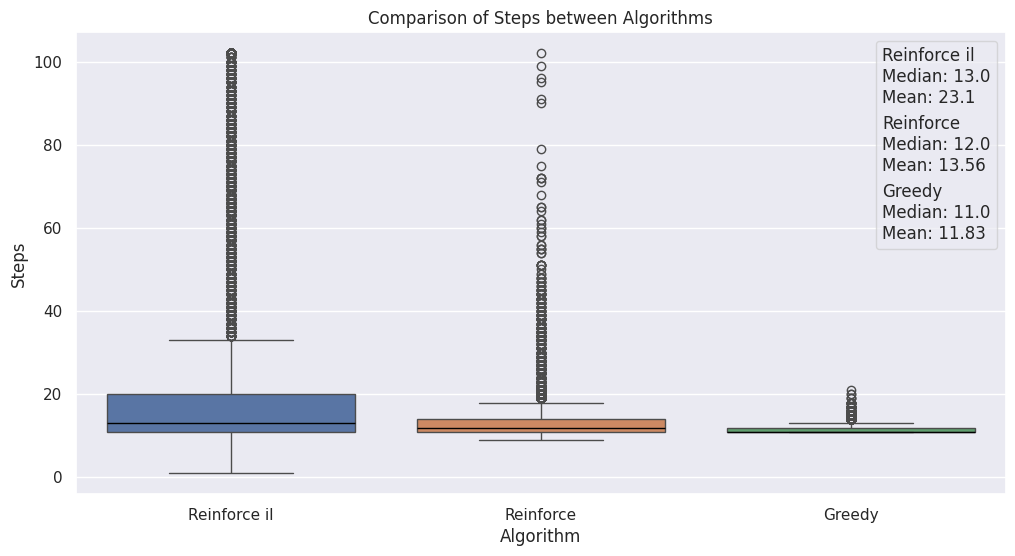

In [68]:
config_2 = get_config(2)
algo_dict = create_results_dict(config_2, ["reinforce_il", "reinforce", "greedy"])
plot_boxplot(f"imgs/box_plot_{config_2}.png", algo_dict)

reinforce_il found 92.71% of the time
reinforce_il mean: 23.56, median: 17.0
reinforce found 92.03% of the time
reinforce mean: 18.46, median: 14.0
greedy found 100.00% of the time
greedy mean: 16.89, median: 15.0


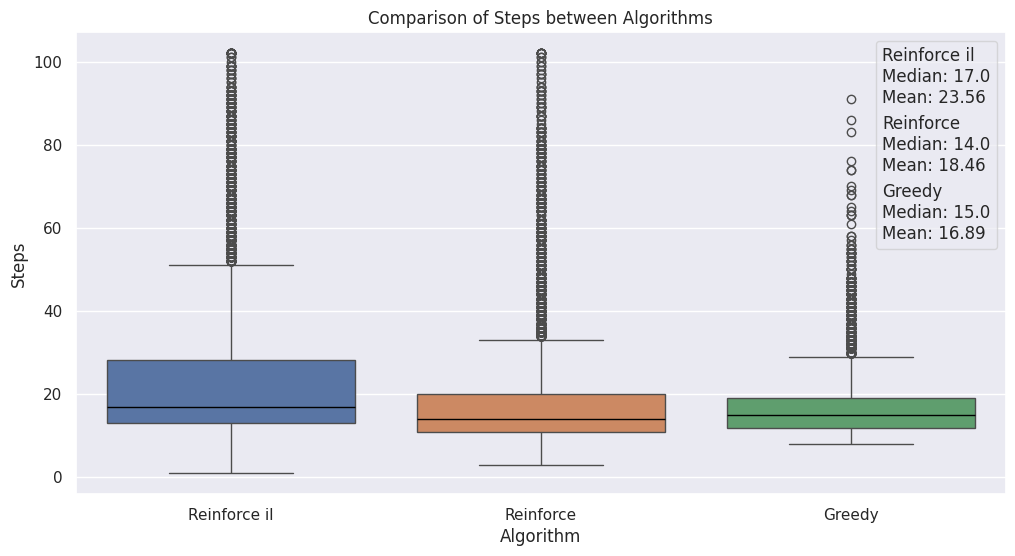

In [67]:
config_4 = get_config(4)
algo_dict = create_results_dict(config_4, ["reinforce_il", "reinforce", "greedy"])
plot_boxplot(f"imgs/box_plot_{config_4}.png", algo_dict)

Greedy mean:  11.8302
Reinforce mean:  13.562


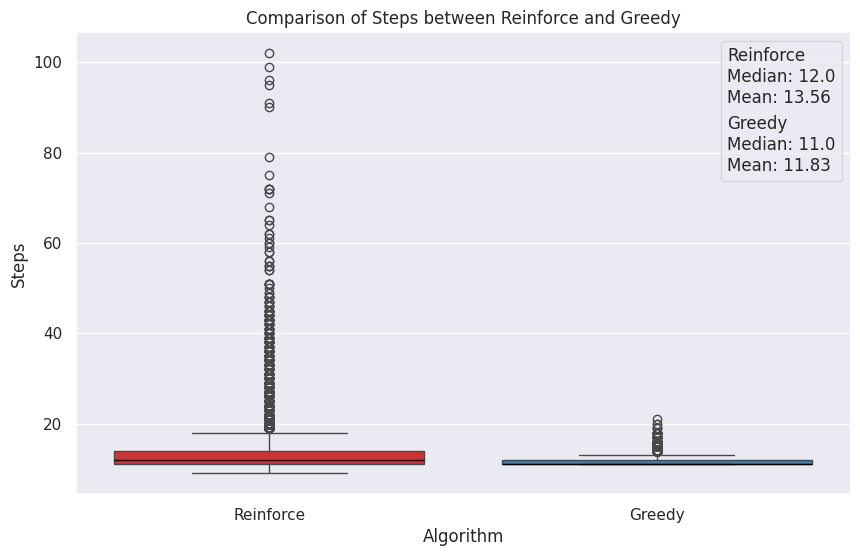

In [17]:
filename = "data/results_20_4_1_new.csv"
plot_boxplot(filename, "imgs/boxplot_20_4_1.png")

Greedy mean:  16.8856
Reinforce mean:  18.4577


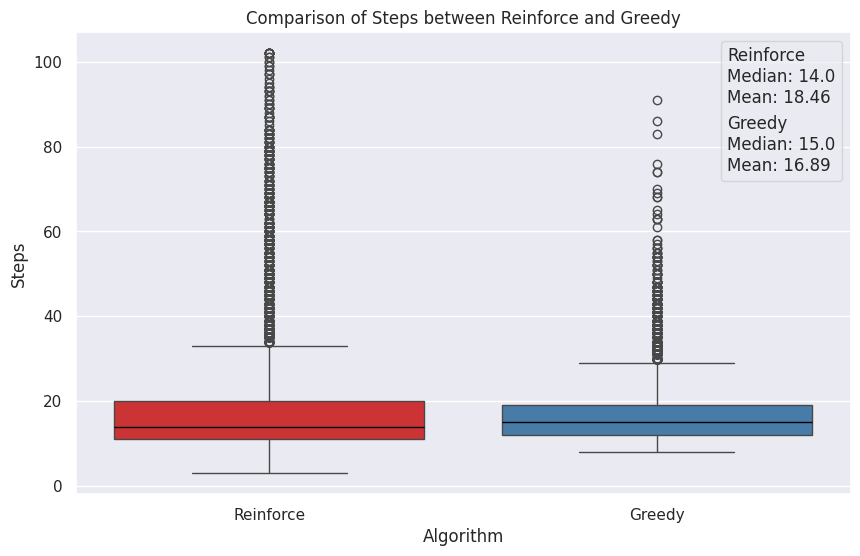

In [18]:
filename = "data/results_20_4_5_new.csv"
plot_boxplot(filename, "imgs/boxplot_20_4_5.png")